In [1]:
import pandas as pd
import cx_Oracle
import csv
import numpy as np
purprod = pd.read_csv('./data/구매상품TR.txt',encoding = "cp949")
purprodA = purprod[purprod['제휴사']=='A']
purprodA

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
2479,A,2757986,1,101,A010101,15148,10,20140920,20,1000
2480,A,2757986,1,106,A010608,15148,10,20140920,20,4100
2481,A,2757987,1,104,A010402,400,10,20140920,12,5000
2482,A,2757987,1,107,A010705,400,10,20140920,12,10200
2483,A,2757988,1,101,A010101,2043,10,20140920,13,3950
...,...,...,...,...,...,...,...,...,...,...
26319577,A,5483507,2,207,A020709,9284,2,20151112,16,3000
26319578,A,5483508,4,402,A040209,2856,2,20151112,12,117000
26319579,A,5484942,9,901,A090103,2258,14,20151112,16,11880
26319580,A,5484943,9,902,A090201,10920,14,20151112,18,1750


In [2]:
x = purprodA
columns = ['제휴사','영수증번호','대분류코드','중분류코드','소분류코드', 
           '고객번호','점포코드','구매일자','구매시간','구매금액',
           'YEAR','구매요일','월']
df_md = pd.DataFrame(x,columns=columns)

df_md['구매일자'] = df_md['구매일자'].astype(str)
df_md['구매일자'] = pd.to_datetime(df_md['구매일자'])

df_md['YEAR'] = df_md['구매일자'].dt.year
df_md['구매요일'] = df_md['구매일자'].dt.dayofweek
df_md['월'] = df_md['구매일자'].dt.month

# 제휴사 A의 총매출과 평균금액
md_sum = df_md['구매금액'].sum()
md_avg = df_md['구매금액'].mean()
md_count =df_md['영수증번호'].value_counts().sum()
md_count_avg =df_md['영수증번호'].value_counts().mean()
print(f'총금액:{md_sum}  평균금액:{round(md_avg,3)}')
print(f'총 구매건수:{md_count} 구매건수평균:{round(md_count_avg,2)}')
df_md

총금액:514841144030  평균금액:89222.317
총 구매건수:5770318 구매건수평균:1.24


,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,YEAR,구매요일,월
2479,A,2757986,1,101,A010101,15148,10,2014-09-20,20,1000,2014,5,9
2480,A,2757986,1,106,A010608,15148,10,2014-09-20,20,4100,2014,5,9
2481,A,2757987,1,104,A010402,400,10,2014-09-20,12,5000,2014,5,9
2482,A,2757987,1,107,A010705,400,10,2014-09-20,12,10200,2014,5,9
2483,A,2757988,1,101,A010101,2043,10,2014-09-20,13,3950,2014,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26319577,A,5483507,2,207,A020709,9284,2,2015-11-12,16,3000,2015,3,11
26319578,A,5483508,4,402,A040209,2856,2,2015-11-12,12,117000,2015,3,11
26319579,A,5484942,9,901,A090103,2258,14,2015-11-12,16,11880,2015,3,11
26319580,A,5484943,9,902,A090201,10920,14,2015-11-12,18,1750,2015,3,11


In [3]:
a = df_md.loc[(df_md['월']<7) & (df_md['YEAR']==2014)]
t = a.groupby(['고객번호']).sum()[['구매금액']]
t

,구매금액
고객번호,
1,19703210
2,24292730
3,80000
4,4628260
5,5444150
...,...
19344,564000
19347,12300
19349,1178590


In [4]:
b = df_md.loc[(df_md['월']>6) & (df_md['월']<13) & (df_md['YEAR']==2014)]
t1 = b.groupby(['고객번호']).sum()[['구매금액']]

In [5]:
c = df_md.loc[(df_md['월']<7) & (df_md['YEAR']==2015)]
t2 = c.groupby(['고객번호']).sum()[['구매금액']]

In [6]:
d = df_md.loc[(df_md['월']>6) & (df_md['월']<13) & (df_md['YEAR']==2015)]
t3 = d.groupby(['고객번호']).sum()[['구매금액']]

In [7]:
df1=pd.merge(t,t1, on='고객번호',how='left')
df1=pd.merge(df1,t2, on='고객번호',how='left') 
df1=pd.merge(df1,t3, on='고객번호',how='left') 
df1=df1.sort_values(by='고객번호')
# df1=df1.reset_index().drop(['index'], axis=1)
df1

C:\Users\admin\AppData\Local\Temp/ipykernel_5216/4072973684.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'구매금액_x'} in the result is deprecated and will raise a MergeError in a future version.
  df1=pd.merge(df1,t3, on='고객번호',how='left')


,구매금액_x,구매금액_y,구매금액_x,구매금액_y
고객번호,,,,
1,19703210,33340300.0,17382750.0,12800890.0
2,24292730,21875650.0,27486650.0,25799820.0
3,80000,NaN,NaN,NaN
4,4628260,3711520.0,3170780.0,2764050.0
5,5444150,2225730.0,2917380.0,2586960.0
...,...,...,...,...
19344,564000,973420.0,1689570.0,156000.0
19347,12300,1013110.0,306580.0,148250.0
19349,1178590,4749800.0,4661170.0,4504330.0


In [8]:
import pandas as pd
import cx_Oracle
import csv
import numpy as np
gender = pd.read_csv('./data/고객DEMO.txt',encoding = "cp949")

In [9]:
## 성별 타입 변환
y = gender
columns = ['고객번호','성별']
df_gender = pd.DataFrame(y,columns=columns)

df_gender['성별'] = df_gender['성별'].astype(str)

df_gender

,고객번호,성별
0,1,M
1,2,M
2,3,M
3,4,F
4,5,M
...,...,...
19378,19379,F
19379,19380,F
19380,19381,F
19381,19382,F


In [10]:
## 이름 바꿔서 합친거
df3 = pd.concat([df_gender,df1],axis=1)
df3.rename(columns={'구매금액_x':'14년상반기','구매금액_y':'14년하반기','구매금액_x':'15년상반기','구매금액_y':'15년하반기'},inplace=True)
df3

,고객번호,성별,15년상반기,15년하반기,15년상반기,15년하반기
0,1,M,NaN,NaN,NaN,NaN
1,2,M,19703210.0,33340300.0,17382750.0,12800890.0
2,3,M,24292730.0,21875650.0,27486650.0,25799820.0
3,4,F,80000.0,NaN,NaN,NaN
4,5,M,4628260.0,3711520.0,3170780.0,2764050.0
...,...,...,...,...,...,...
19378,19379,F,NaN,NaN,NaN,NaN
19379,19380,F,NaN,NaN,NaN,NaN
19380,19381,F,NaN,NaN,NaN,NaN
19381,19382,F,NaN,NaN,NaN,NaN


In [31]:
df2.rename(columns={'구매금액_x':'14년1월','구매금액_y':'15년1월','구매금액_x':'14년6월','구매금액_y':'15년6월','구매금액_x':'14년11월','구매금액_y':'15년11월'},inplace=True)
df2

,14년11월,15년11월,14년11월,15년11월,14년11월,15년11월
중분류코드,,,,,,
101,131901760,143909550,1.320171e+08,1.523373e+08,1.492650e+08,1.007146e+08
102,724487170,252917420,2.133342e+08,2.457380e+08,2.377935e+08,2.474276e+08
103,119085170,79627430,7.911879e+07,7.055134e+07,7.448312e+07,6.335148e+07
104,688461510,565999310,5.292422e+08,4.872295e+08,4.275753e+08,4.064075e+08
105,406114140,310625660,2.283842e+08,2.139798e+08,2.023235e+08,1.814444e+08
106,809233670,817281280,6.778567e+08,6.419321e+08,7.547432e+08,7.604154e+08
107,73155660,64738410,6.080552e+07,6.082617e+07,6.680956e+07,7.291961e+07
108,548779130,222577400,2.125163e+08,2.869200e+08,2.628298e+08,2.734957e+08
109,410694080,118600960,1.689175e+08,1.643086e+08,2.700275e+08,3.173307e+08


In [28]:
df2=pd.merge(tt,ttt, on='중분류코드',how='left')
df2=pd.merge(df2,zz, on='중분류코드',how='left')
df2=pd.merge(df2,zzz, on='중분류코드',how='left')
df2=pd.merge(df2,rr, on='중분류코드',how='left')
df2=pd.merge(df2,rrr, on='중분류코드',how='left')
df2

C:\Users\admin\AppData\Local\Temp/ipykernel_5216/680470780.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'구매금액_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2=pd.merge(df2,zzz, on='중분류코드',how='left')
C:\Users\admin\AppData\Local\Temp/ipykernel_5216/680470780.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'구매금액_x'} in the result is deprecated and will raise a MergeError in a future version.
  df2=pd.merge(df2,rrr, on='중분류코드',how='left')


,구매금액_x,구매금액_y,구매금액_x,구매금액_y,구매금액_x,구매금액_y
중분류코드,,,,,,
101,131901760,143909550,1.320171e+08,1.523373e+08,1.492650e+08,1.007146e+08
102,724487170,252917420,2.133342e+08,2.457380e+08,2.377935e+08,2.474276e+08
103,119085170,79627430,7.911879e+07,7.055134e+07,7.448312e+07,6.335148e+07
104,688461510,565999310,5.292422e+08,4.872295e+08,4.275753e+08,4.064075e+08
105,406114140,310625660,2.283842e+08,2.139798e+08,2.023235e+08,1.814444e+08
106,809233670,817281280,6.778567e+08,6.419321e+08,7.547432e+08,7.604154e+08
107,73155660,64738410,6.080552e+07,6.082617e+07,6.680956e+07,7.291961e+07
108,548779130,222577400,2.125163e+08,2.869200e+08,2.628298e+08,2.734957e+08
109,410694080,118600960,1.689175e+08,1.643086e+08,2.700275e+08,3.173307e+08


In [22]:
a2 = df_md.loc[(df_md['월']==1) & (df_md['YEAR']==2015)]
ttt = a2.groupby(['중분류코드']).sum()[['구매금액']]

In [30]:
a1 = df_md.loc[(df_md['월']==1) & (df_md['YEAR']==2014)]
tt = a1.groupby(['중분류코드']).sum()[['구매금액']]
tt

,구매금액
중분류코드,
101,131901760
102,724487170
103,119085170
104,688461510
105,406114140
106,809233670
107,73155660
108,548779130
109,410694080


In [29]:
a3 = df_md.loc[(df_md['월']==6) & (df_md['YEAR']==2014)]
zz = a3.groupby(['중분류코드']).sum()[['구매금액']]
zz

,구매금액
중분류코드,
101,132017090
102,213334200
103,79118790
104,529242180
105,228384180
106,677856660
107,60805520
108,212516270
109,168917490


In [25]:
a4 = df_md.loc[(df_md['월']==6) & (df_md['YEAR']==2015)]
zzz = a4.groupby(['중분류코드']).sum()[['구매금액']]

In [26]:
a5 = df_md.loc[(df_md['월']==11) & (df_md['YEAR']==2014)]
rr = a5.groupby(['중분류코드']).sum()[['구매금액']]

In [27]:
a6 = df_md.loc[(df_md['월']==11) & (df_md['YEAR']==2015)]
rrr = a6.groupby(['중분류코드']).sum()[['구매금액']]

In [11]:
# 월,년별 구매금액
ex = df_md.groupby(['월','YEAR']).sum()[['구매금액']]
ex

구매금액
월  YEAR             
1  2014  20957673260
   2015  20898350420
2  2014  17079312000
   2015  20711529040
3  2014  19982329370
   2015  22200198890
4  2014  19928395250
   2015  22696990730
5  2014  21800068960
   2015  23891320400
6  2014  18866989070
   2015  18312808750
7  2014  17808099440
   2015  19233698530
8  2014  17738558600
   2015  18535920780
9  2014  18601451490
   2015  20157717170
10 2014  23894417390
   2015  25895075490
11 2014  27505652060
   2015  27465388920
12 2014  24944763310
   2015  25734434710

<AxesSubplot:xlabel='월,YEAR'>

C:\Users\admin\anaconda3\envs\kjk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\kjk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\kjk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\kjk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\anaconda3\envs\kjk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_fi

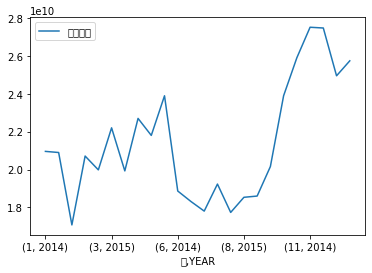

In [13]:
ex.plot()

In [33]:
a1 = df_md.loc[(df_md['월']==1) & (df_md['YEAR']==2014)]
tt = a1.groupby(['중분류코드']).sum()[['구매금액']]
a2 = df_md.loc[(df_md['월']==1) & (df_md['YEAR']==2015)]
ttt = a2.groupby(['중분류코드']).sum()[['구매금액']]
df2=pd.merge(tt,ttt, on='중분류코드',how='left')
df2['구매액증감률'] = df2.구매금액_y - df2.구매금액_x

In [34]:
b = df_md.loc[(df_md['월']==6) & (df_md['YEAR']==2014)]
tt6 = b.groupby(['중분류코드']).sum()[['구매금액']]
b2 = df_md.loc[(df_md['월']==6) & (df_md['YEAR']==2015)]
ttt6 = b2.groupby(['중분류코드']).sum()[['구매금액']]
df3=pd.merge(tt6,ttt6, on='중분류코드',how='left')
df3['구매액증감률'] = df3.구매금액_y - df3.구매금액_x

In [35]:
c = df_md.loc[(df_md['월']==11) & (df_md['YEAR']==2014)]
tt11 = c.groupby(['중분류코드']).sum()[['구매금액']]
c2 = df_md.loc[(df_md['월']==11) & (df_md['YEAR']==2015)]
ttt11 = c2.groupby(['중분류코드']).sum()[['구매금액']]
df4=pd.merge(tt11,ttt11, on='중분류코드',how='left')
df4['구매액증감률'] = df4.구매금액_y - df4.구매금액_x

In [36]:
df=pd.merge(df2,df3, on='중분류코드',how='left')
df=pd.merge(df,df4, on='중분류코드',how='left')
df

,구매금액_x_x,구매금액_y_x,구매액증감률_x,구매금액_x_y,구매금액_y_y,구매액증감률_y,구매금액_x,구매금액_y,구매액증감률
중분류코드,,,,,,,,,
101,131901760,143909550,12007790,1.320171e+08,1.523373e+08,20320250.0,1.492650e+08,1.007146e+08,-48550360.0
102,724487170,252917420,-471569750,2.133342e+08,2.457380e+08,32403770.0,2.377935e+08,2.474276e+08,9634190.0
103,119085170,79627430,-39457740,7.911879e+07,7.055134e+07,-8567450.0,7.448312e+07,6.335148e+07,-11131640.0
104,688461510,565999310,-122462200,5.292422e+08,4.872295e+08,-42012720.0,4.275753e+08,4.064075e+08,-21167780.0
105,406114140,310625660,-95488480,2.283842e+08,2.139798e+08,-14404370.0,2.023235e+08,1.814444e+08,-20879090.0
106,809233670,817281280,8047610,6.778567e+08,6.419321e+08,-35924530.0,7.547432e+08,7.604154e+08,5672210.0
107,73155660,64738410,-8417250,6.080552e+07,6.082617e+07,20650.0,6.680956e+07,7.291961e+07,6110050.0
108,548779130,222577400,-326201730,2.125163e+08,2.869200e+08,74403690.0,2.628298e+08,2.734957e+08,10665900.0
109,410694080,118600960,-292093120,1.689175e+08,1.643086e+08,-4608940.0,2.700275e+08,3.173307e+08,47303240.0


In [39]:
df.rename(columns={'구매금액_x_x':'14년1월','구매금액_y_x':'15년1월','구매액증감률_x':'증감률',
                    '구매금액_x_y':'14년6월','구매금액_y_y':'15년6월','구매액증감률_y':'증감률',
                    '구매금액_x':'14년11월','구매금액_y':'15년11월','구매액증감률':'증감률'},inplace=True)
df

,14년1월,15년1월,증감률,14년6월,15년6월,증감률,14년11월,15년11월,증감률
중분류코드,,,,,,,,,
101,131901760,143909550,12007790,1.320171e+08,1.523373e+08,20320250.0,1.492650e+08,1.007146e+08,-48550360.0
102,724487170,252917420,-471569750,2.133342e+08,2.457380e+08,32403770.0,2.377935e+08,2.474276e+08,9634190.0
103,119085170,79627430,-39457740,7.911879e+07,7.055134e+07,-8567450.0,7.448312e+07,6.335148e+07,-11131640.0
104,688461510,565999310,-122462200,5.292422e+08,4.872295e+08,-42012720.0,4.275753e+08,4.064075e+08,-21167780.0
105,406114140,310625660,-95488480,2.283842e+08,2.139798e+08,-14404370.0,2.023235e+08,1.814444e+08,-20879090.0
106,809233670,817281280,8047610,6.778567e+08,6.419321e+08,-35924530.0,7.547432e+08,7.604154e+08,5672210.0
107,73155660,64738410,-8417250,6.080552e+07,6.082617e+07,20650.0,6.680956e+07,7.291961e+07,6110050.0
108,548779130,222577400,-326201730,2.125163e+08,2.869200e+08,74403690.0,2.628298e+08,2.734957e+08,10665900.0
109,410694080,118600960,-292093120,1.689175e+08,1.643086e+08,-4608940.0,2.700275e+08,3.173307e+08,47303240.0
